# Project group 22

## Section 0 : TA feedback
score : 24.4/30
- Mechanics : 3pts
- Reasoning : 9 pts - need more justification than "not needed" when dropping variables
- Writing : 2.4pts - need more comments in code
- Visualization : 6 pts - visualization not very informative, you could consider using jitter - it's hard to see shapes or color of all dots are crammed in the same line. <br> <br>
Sections where the Stage 1 was revised according to feedback are given in bold.

# Stage 1

## section 1
1. The dataset provided for our group is the online shoppers purchase intention.
The dataset contains data from 12330 sessions and the dataset analyses whether the customers at the store ends up shopping or not. We will remove the data from region 1 for the analysis.
None of the fields have missing values. 
There are 18 fields and their data types and field names are given below.
- Administrative - integer - represents the number of administrative pages visited
- Administrative duration - float - represents the duration spent on administrative pages in minutes
- Informal - integer - represents the number of informal pages visited by the user.
- Informal Duration - float - represents the duration spent on informal pages in minutes
- Product Related - integer - represents the number of products related pages visited
- Product Related Duration - float - represents the time spent on product related pages in minutes.
- Bounce Rates - float - the percentage of visitors who enter the site and leave without triggering any other requests to the analytics server during that session. 
- Exit Rates - float - the percentage for all page views were the last in the session.
- Page Values - float - the average value for a web page that a user visited before completing an e-commerce transaction.
- Special Day - float - the closeness of the site visiting time to a specific special day when the sessions are more likely to be finalized with transaction.
- Month - string - Name of the month of this session
- Operating Systems - integer - operating system type
- Browser - integer - browser type 
- Region (region 1 needs to be removed) - integer
- traffic Type - integer - the traffic type
- Visitor Type - string - returning or new visitor
- Weekend - boolean - is the date a weekend or not
- Revenue - boolean - did the visitor end up purchasing or not.

2. the data are from the online shoppers purchasing intention dataset where there are 12330 sessions and each session belongs to a different user in a 1 year period. This data are collected from an unspecified retail website.
3. Pre-selection of variables - **I would drop the variables operating system, browser, traffic type, administrative, administrative_duration, informational, informational_duration in this dataset since they wouldnt be needed for my speciifc analysis. Since my analysis is about whether the productRelated_Duration has an association with the time of the year (month, weekend etc.) and the visitor type, the above given variables which are in a different behavioral category would not be required for my specific analysis.**

## section 2
1. I want to examine the assosiation between productRelated_duration and the time of the year(month, special day, weekend) and visitor type (new user or a returning user). I want to see if the duration a user looks at a certain product is associated with the the time of year and their visitor type.
2. The response variable would be the product related duration.
3.  I would focus on inference and would like to explore if the duration a user looks at a product is associated with the time(whether it is a weekend, close to a special day and what month) and the visitors type (returning or new visitor). 
   

## section 3


In [32]:
#import the libraries
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)

In [33]:
shoppers_data <- read_csv("https://raw.githubusercontent.com/silunij/statproject/refs/heads/main/online_shoppers_intention.csv")
#read the data

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [34]:
#filter and remove region 1 and remove the fields that are not needed for the analysis
shoppers_data <- shoppers_data%>%
    filter(Region != 1) %>%
    select(-OperatingSystems, -Browser, -TrafficType, -Administrative, -Administrative_Duration, -Informational, -Informational_Duration)%>%
    mutate(Month = as.factor(Month), VisitorType = as.factor(VisitorType))

In [35]:
head(shoppers_data)
#view some of the cleaned data

ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<lgl>,<lgl>
1,0.000000,0.20000,0.20000000,0,0.0,Feb,9,Returning_Visitor,FALSE,FALSE
2,2.666667,0.05000,0.14000000,0,0.0,Feb,2,Returning_Visitor,FALSE,FALSE
1,0.000000,0.20000,0.20000000,0,0.4,Feb,3,Returning_Visitor,FALSE,FALSE
2,37.000000,0.00000,0.10000000,0,0.8,Feb,2,Returning_Visitor,FALSE,FALSE
3,395.000000,0.00000,0.06666667,0,0.0,Feb,3,Returning_Visitor,FALSE,FALSE
16,407.750000,0.01875,0.02583333,0,0.4,Feb,4,Returning_Visitor,FALSE,FALSE


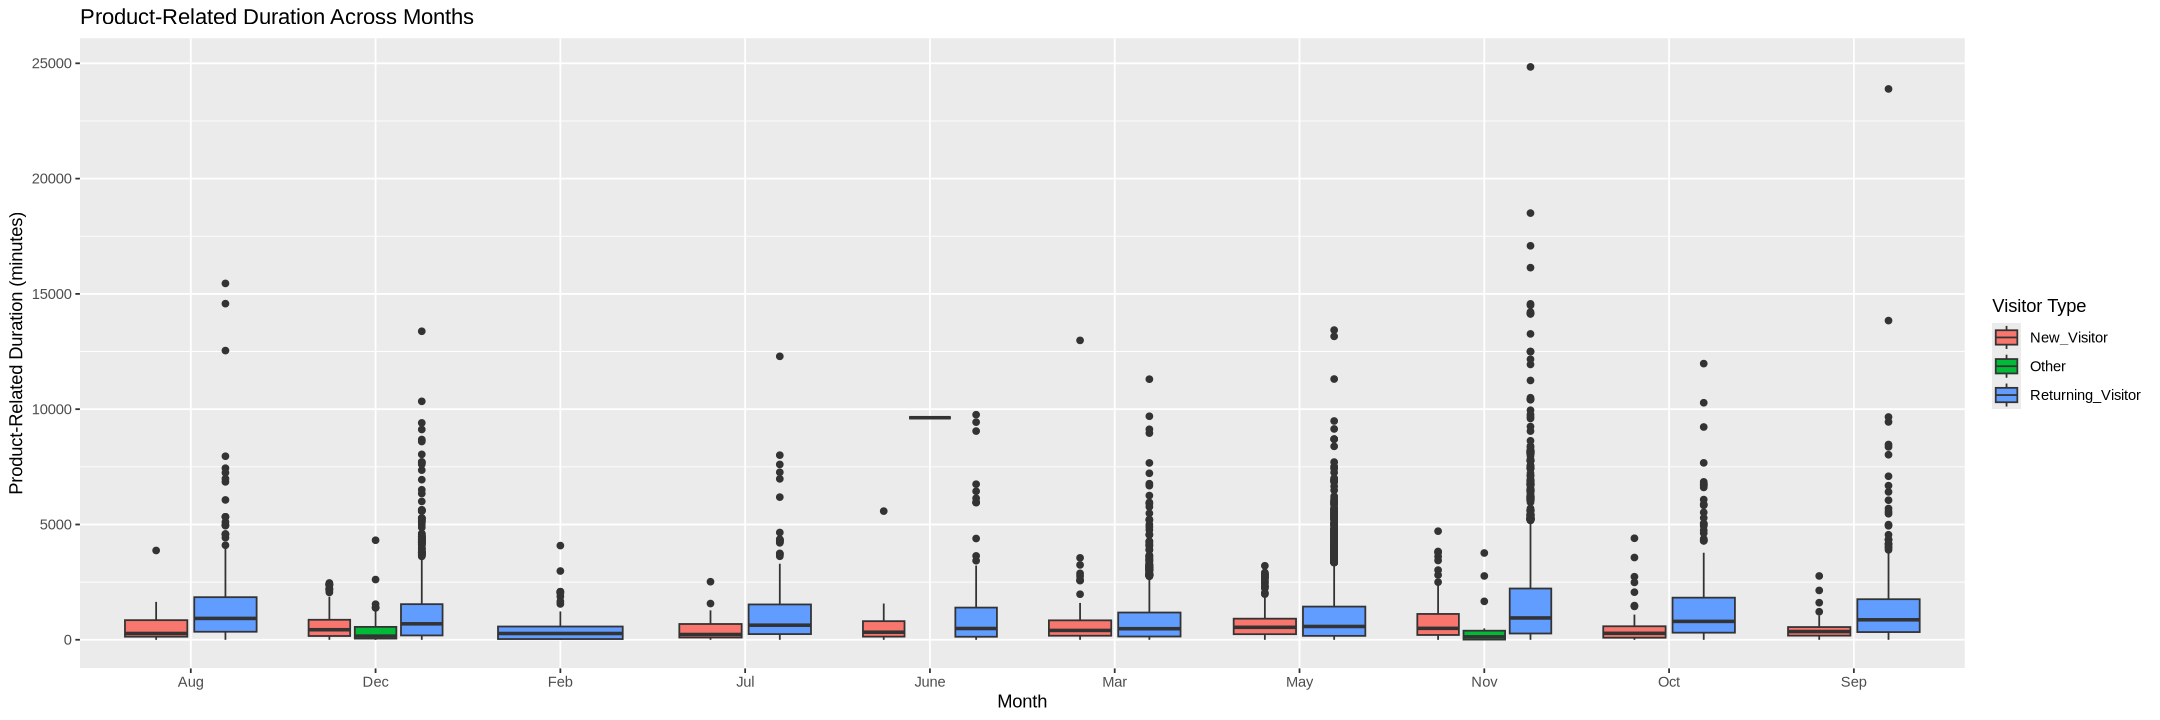

In [36]:
library(ggplot2)
#FEEDBACK - visualization not very informative, you could consider using jitter -
#it's hard to see shapes or color of all dots are crammed in the same line

# options(repr.plot.width = 18, repr.plot.height = 6)
# ggplot(shoppers_data, aes(x = SpecialDay, y = ProductRelated_Duration, color = VisitorType, shape = Weekend)) +
#   geom_point() +
#     facet_grid(~Month)+
#   labs(
#     title = "Duration vs. Closeness to Special Day by Month",
#     x = "Closeness to a Special Day",
#     y = "Product-Related Duration (minutes)"
#   )

options(repr.plot.width = 18, repr.plot.height = 6)

ggplot(shoppers_data, 
       aes(x = as.factor(Month), 
           y = ProductRelated_Duration, 
           fill = VisitorType)) +
  geom_boxplot() +
  labs(
    title = "Product-Related Duration Across Months",
    x = "Month",
    y = "Product-Related Duration (minutes)",
    fill = "Visitor Type"
  ) 


*plot relevance* <br>
- **The above plot is relevent because it shows the product related duration according to months and colored according to the visitor type. It is useful since month and visitor type are 2 covariates considered for this analysis.**
- **Since month and visitor type are both categorical variables it is useful summarize and compare the product related duration for each month and see how visitor types are associated for each month.** 

*intepretation* <br>
- **This plot shows how the product related duration spent by a user varies over different months for different user types.**
- **Some months have visitors who spend extremely high numbers of minutes spent looking at products.**
- **The median line shows where the central value for each month according to visitor type lies.** 
- **With the outliers of the plot, we can also get an idea about the unusually long or short times spent on product related pages.**

*insights* <br>
- **Monthly differences in product related duration shows a possible association between month and the product related duration.**
- **Months that have a higher number of outliers could suggest seasonal spikes(such as closeness to a special day.)**
- **This side by side comparison also helps identify seasonal patterns which is relevant to the research question since I wanted to see if theres an association between time of the year and product related duration.**


# Stage 2


## Section 4
*method selection* <br>
- I propose using a multiple linear regression model to examine how ProductRelated_Duration is associated with Month, VisitorType, and SpecialDay (closeness to a special day).
- This is an additive model which allows us to evaluate how each individual covariates associate with productRelated_Duration while holding the other variables constant.
- Multiple linear regression is appropriate because my outcome variable, ProductRelated_Duration, is continuous, and the method allows me to assess the independent association each of each predictor (Month, VisitorType, SpecialDay) has with browsing duration. It also enables comparison across categories such as different months and visitor types.
<br>

*assumption* <br>
- Since this is an additive model, one assumption is that the association between a unit change of the productRelated_duration per other covariates is the same, regadless of the other variables in the model.
- The model also assumes linearity, independent observations, constant variance, and normally distributed residuals.<br>

*limitation* <br>
- A limitation is that the true relationship between productRelated_Duration and the predictors may not be additive and could have an interaction, violating the assumption that the unit change in the productRelated_Duration per other covariates in the model remains the same regadless of the other variables.
- Additionally, outliers in the productRelated_Duration could influence the coefficient estimates. 


## section 5


In [37]:
#installing car package to get vif()
install.packages("car")
library(car) 
#creating the LM model for the research question and running vif to detect if theres multicollinearity between the covariates
shoppers_model <- lm(formula = ProductRelated_Duration ~ SpecialDay+ Month+Weekend + VisitorType, data = shoppers_data)
shoppers_model %>% vif()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



,GVIF,Df,GVIF^(1/(2*Df))
SpecialDay,1.290395,1,1.135956
Month,1.356384,9,1.017079
Weekend,1.008568,1,1.004275
VisitorType,1.060353,2,1.014758


All the GVIF values show a low multicollinearity which is a gvif value well below 5, so independant effects of each predictor on ProductRelated_Duration can be intepreted confidently. 

In [39]:
#visualization : lm model results with 90% confidence interval
shoppers_model_results <- tidy(shoppers_model, conf.int = TRUE, conf.level = 0.95)%>%
    mutate_if(is.numeric, round, 2)

shoppers_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),831.36,107.33,7.75,0.00,620.96,1041.76
SpecialDay,68.11,105.05,0.65,0.52,-137.82,274.03
MonthDec,-296.30,108.38,-2.73,0.01,-508.76,-83.83
MonthFeb,-1040.27,189.93,-5.48,0.00,-1412.59,-667.95
MonthJul,-340.11,135.53,-2.51,0.01,-605.79,-74.44
MonthJune,-295.14,151.64,-1.95,0.05,-592.40,2.11
MonthMar,-550.59,107.69,-5.11,0.00,-761.69,-339.49
MonthMay,-402.97,104.78,-3.85,0.00,-608.37,-197.56
MonthNov,165.79,104.05,1.59,0.11,-38.19,369.77


*intepretation of results* <br>
- Looking at the p.values of the above table, there is not enough evidence at 5% significance level to reject the H0 that SpecialDay(closeness to a special day) has no association with unit increase of ProductRelated_duration keeping all the other variables constant .
- ReturningVisitorType and the some of the months (such as December, february, july, march, may, october) have a p-value less than 0.05 meaning that the null hypothesis that each of these variables have an association with the unit increase of productRelated_duration can be rejected at 5% significance level.
- Looking at the confidence levels, for some predictors, the confidence interval of productRelated_duration is relatively wider than for other predictors suggesting a higher variability and reduced precision which is a potential issue.
- Overall, the results of the above MLR model table shows that Special day doesnt seem to have an association with ProductRelated_duration while we can reject the null hypothesis that the ProductRelated_Duratio has no association with Month and WeekenedTRUE predictors.

#### References

Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0